#### Import libs

In [1]:
import pandas as pd
import numpy as np
from decouple import config
import matplotlib.pyplot as plt
import seaborn as sns
PROCESSED_DATA_PATH = config('PROCESSED_DATA_PATH')
RAW_DATA_PATH = config('RAW_DATA_PATH')

# pandas options display
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',50)
# matplotlib options display
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')

#### Load Data

In [2]:
df_tmp = pd.read_csv(RAW_DATA_PATH+'house_data.csv')

#### Processing data

In [3]:
df_tmp = df_tmp.drop(['fire insurance (R$)','total (R$)'],axis=1)

#### Verifying data

In [4]:
df_tmp.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [5]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


#### Methods

In [6]:
def filtered_cat_num_columns (dataframe:pd.DataFrame,)->tuple :
    '''
        This method takes columns from your type, two types in specific
        object type and numerical types.

        Parameters:
            dataframe : A dataframe that contains data to filter columns
        
    '''
    cat_columns = dataframe.columns[dataframe.dtypes == object]
    num_columns = dataframe.columns[dataframe.dtypes != object]

    return cat_columns, num_columns

In [7]:
def plot_categorical_data (dataframe:pd.DataFrame, cat_columns:list) :
    '''
        This method plot categorical data.

        Parameters : 
            dataframe : A dataframe to plot categorical data
            cat_columns : A previously filtered categorical data
    '''
    fig, axs = plt.subplots(len(cat_columns))
    for idx,cat in enumerate(cat_columns) :
        axs[idx].bar(
            x=dataframe[cat].value_counts().keys(),
            height=dataframe[cat].value_counts(
                normalize=True).values)

In [8]:
def plotting_numeric_data (
    data:pd.DataFrame,
    numeric_columns:list,
    title_of_plot:str) :

    '''
        This method plot numeric data in two columns,
        when one contains a boxplot and other with histplot

        Parameters :
            data : A dataframe to plot numerica data
            numeric_columns : A previously filtered numeric data columns
            title_of_plot: A title to all plots    
    '''

    # Size of figure
    fig, ax = plt.subplots(figsize=(20,30))
    # Wall color
    color_wall = '#f5f5f5'
    fig.set_facecolor(color_wall)
    # Color palette
    palette = sns.color_palette('flare', len(numeric_columns)*2)
    # Title
    plt.suptitle(
        title_of_plot, 
        fontsize=22,
        color='#404040',
        fontweight=600 )
    
    # Structure of plot
    lines = len(numeric_columns)
    number_of_columns_to_plot = 2 # Boxplot and Histplot
    position = 1 # Initial position of grid
    
    # Creating plot
    for column in numeric_columns :
        # Plot at the grid
        plt.subplot(lines, number_of_columns_to_plot, position)
        # Plot boxplot
        sns.boxplot(data=data, y=column)
        # Change position
        position+=1
        #plot at the grid
        plt.subplot(lines, number_of_columns_to_plot, position)
        # Plot histplot
        sns.histplot(data[column],kde=True, stat='density')
        # Change position
        position+=1
    # Adjust grid
    plt.subplots_adjust(top=0.95, hspace=0.3)
    return plt.show()

#### EDA

In [9]:
# Filtering data
cat_columns, num_columns = filtered_cat_num_columns(df_tmp)

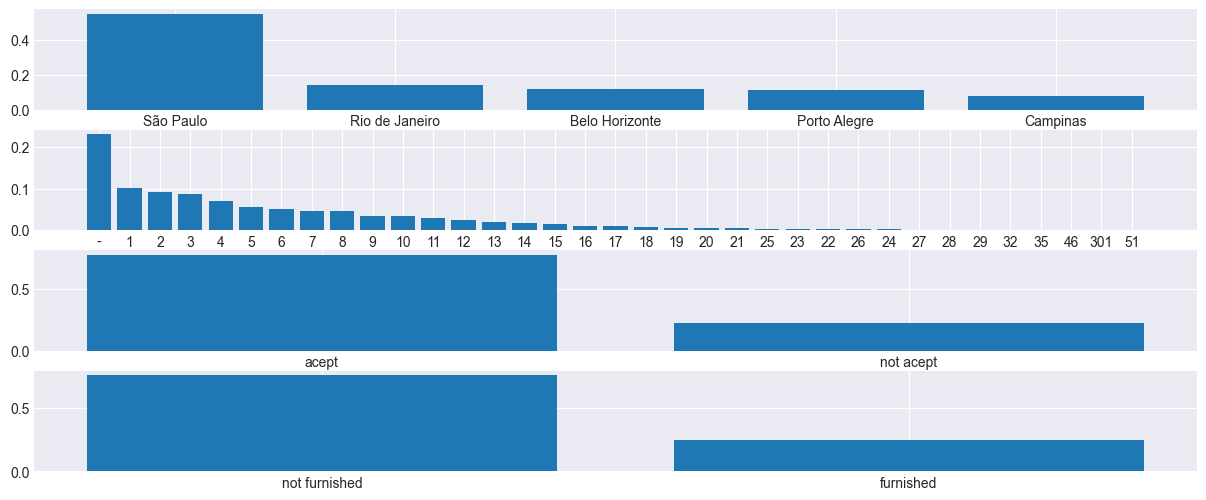

In [10]:
plot_categorical_data(df_tmp, cat_columns)

#### Correcting data floor

In [11]:
# Changing wrong data
df_tmp.loc[df_tmp['floor'] == '301']
df_tmp.iloc[2562,5] = 30
# Changing data object in floor columns
df_tmp['floor'] = pd.to_numeric(df_tmp['floor'].apply(lambda x: 0 if x == '-' else x))

#### Analyzing data columns

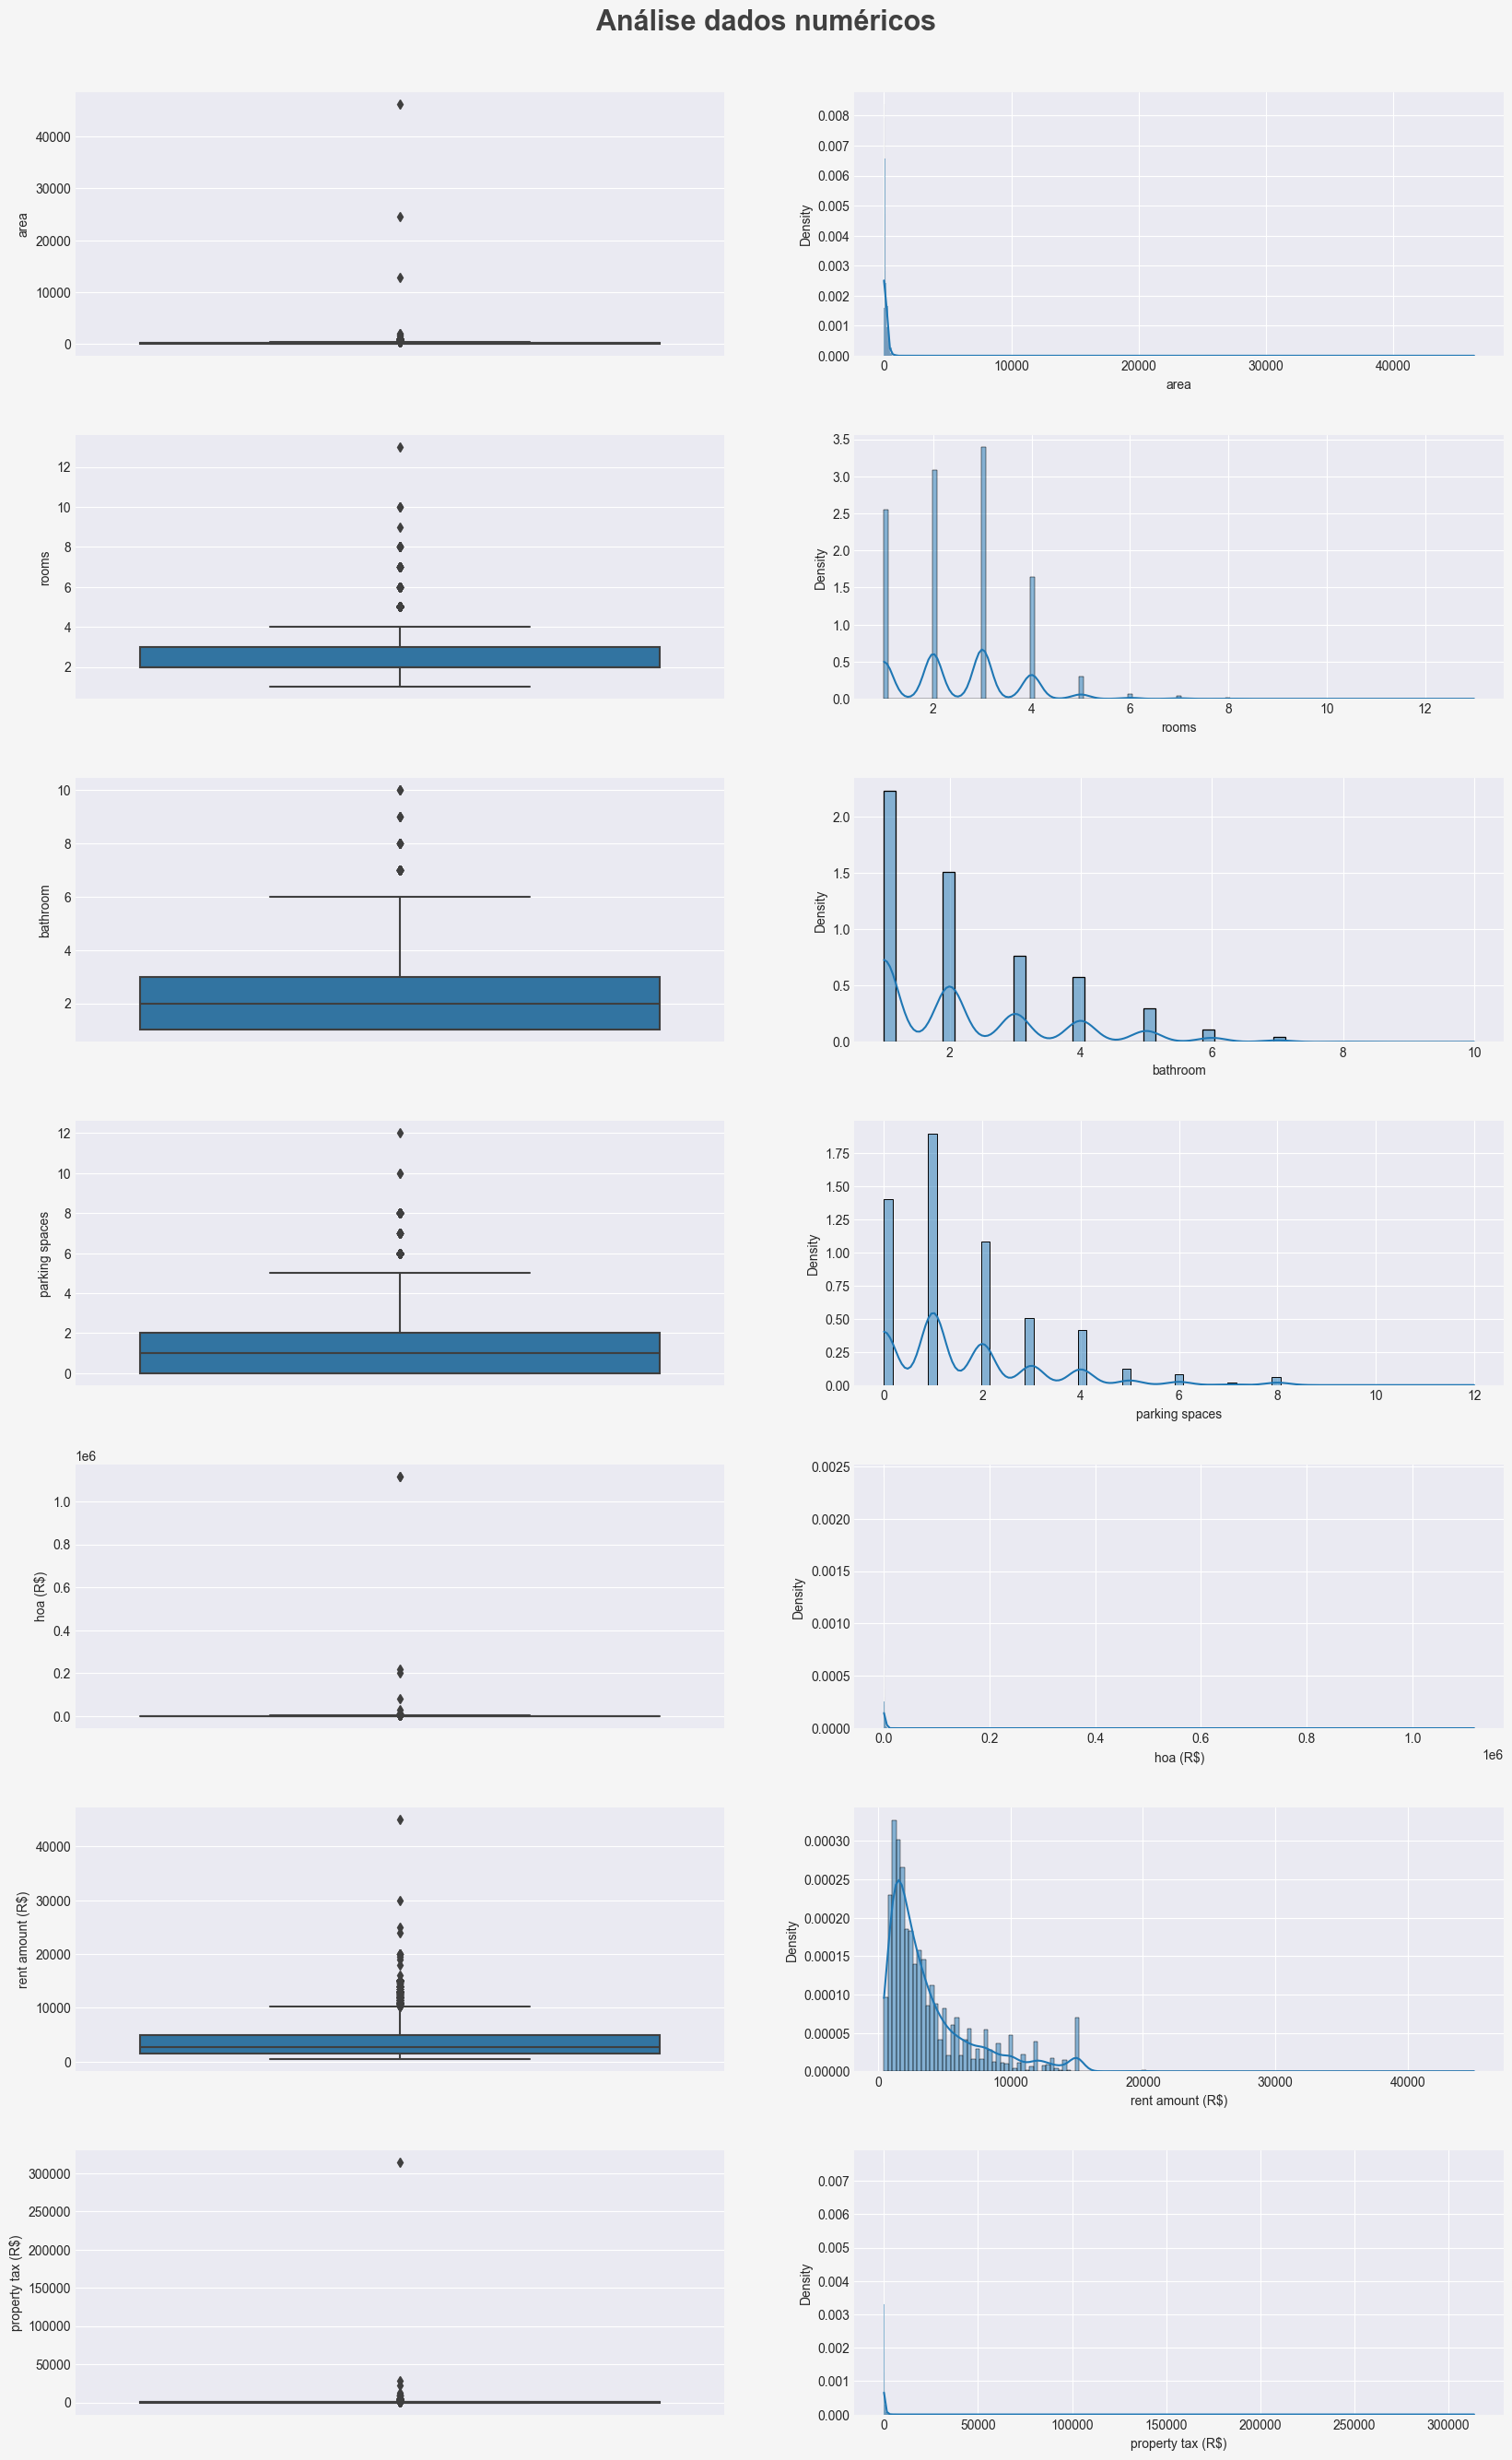

In [12]:
plotting_numeric_data(df_tmp, num_columns, 'Análise dados numéricos')